# Predicting Heart Disease using Machine Learning 

This notebook looks into using various python-based machine learning and data science libraries, in an attempt to predict if someone has a heart disease or not? Based on their medical attributes. 

## The following is the framework being used here to predict the heart disease:

1. Problem Definition 
2. Data 
3. Evaluation 
4. Features 
5. Modeling 
6. Experimentation 

## 1. Problem Definition
In a statement, `Given clinical parameters about a patient, can we predict whether or not they have heart disease?`

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. 
``https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset``

## 3. Evaluation
If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features
This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

**Create data dictionary**

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
    * 0: Typical angina: chest pain related decrease blood supply to the heart
    * 1: Atypical angina: chest pain not related to heart
    * 2: Non-anginal pain: typically esophageal spasms (non heart related)
    * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
    * serum = LDL + HDL + .2 * triglycerides
    * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
    * '>126' mg/dL signals diabetes
7. restecg - resting electrocardiographic results
    * 0: Nothing to note
    * 1: ST-T Wave abnormality
        * can range from mild symptoms to severe problems
        * signals non-normal heart beat
    * 2: Possible or definite left ventricular hypertrophy
        * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
    * 0: Upsloping: better heart rate with excercise (uncommon)
    * 1: Flatsloping: minimal change (typical healthy heart)
    * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
    * colored vessel means the doctor can see the blood passing through
    * the more blood movement the better (no clots)
13. thal - thalium stress result
    * 1,3: normal
    * 6: fixed defect: used to be defect but ok now
    * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [1]:
# Getting the tools ready 

# Regular EDA (Exploratory Data Analysis) and Plotting Libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # build on matplotlib 

# Since we want our plots to appear inside the notebook 
%matplotlib inline 

# Models from scikit-learn 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier 

# Model Evaluation 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import precision_score, recall_score, f1_score 
# from sklearn.metrics import plot_roc_curve # now depricated 
from sklearn.metrics import RocCurveDisplay 

# # Assuming 'model' is your trained classifier, and X_test, y_test are your test data:
# roc_disp = RocCurveDisplay.from_estimator(model, X_test, y_test)
# roc_disp.plot()

## Load Data 

In [4]:
df = pd.read_csv("./data/heart-disease.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Data Exploration; (Exploratory Data Analysis--EDA)

The goal here is find out more about the data and have a complete understanding of the data we working with. 

The recommended framework to be followed: 

1. What questions are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should we care about them?
5. How can you add, change, or remove features to get more out of the data? 

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
# Figuring out the number of classes 

df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

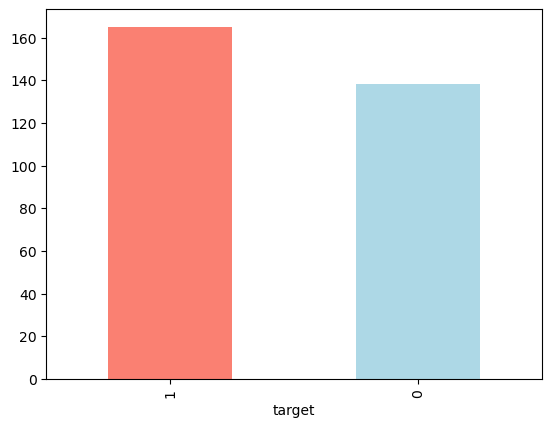

In [12]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [13]:
# Get information on the data; and look for the anomalies--missing values, data types, and others

df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [14]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Comparing diff columns to figure out the pattern with the target column 

### 1. Heart disease frequency according to sex 

In [16]:
# exploring data; Sex -- 1; Male, and 0; Female 

df["sex"].value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [17]:
# comparing target column with the sex columns; using pandas function -- crosstab 

pd.crosstab(df["target"], df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


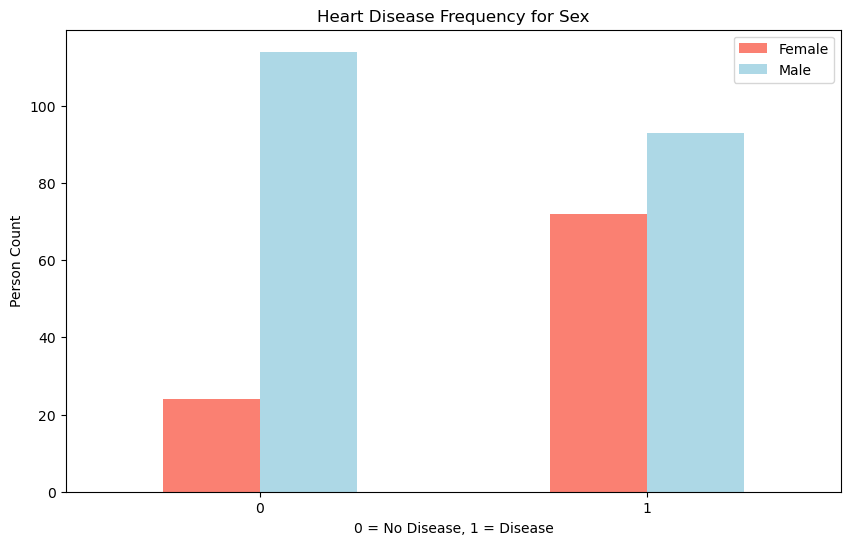

In [25]:
# Visual representation of the compared data; sex vs target 

pd.crosstab(df["target"],df["sex"]).plot(kind="bar", figsize=(10, 6), color=["salmon","lightblue"]);

# refining the visual representation 
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Person Count")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0); 

In [26]:
# Make a corelation matrix 

df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


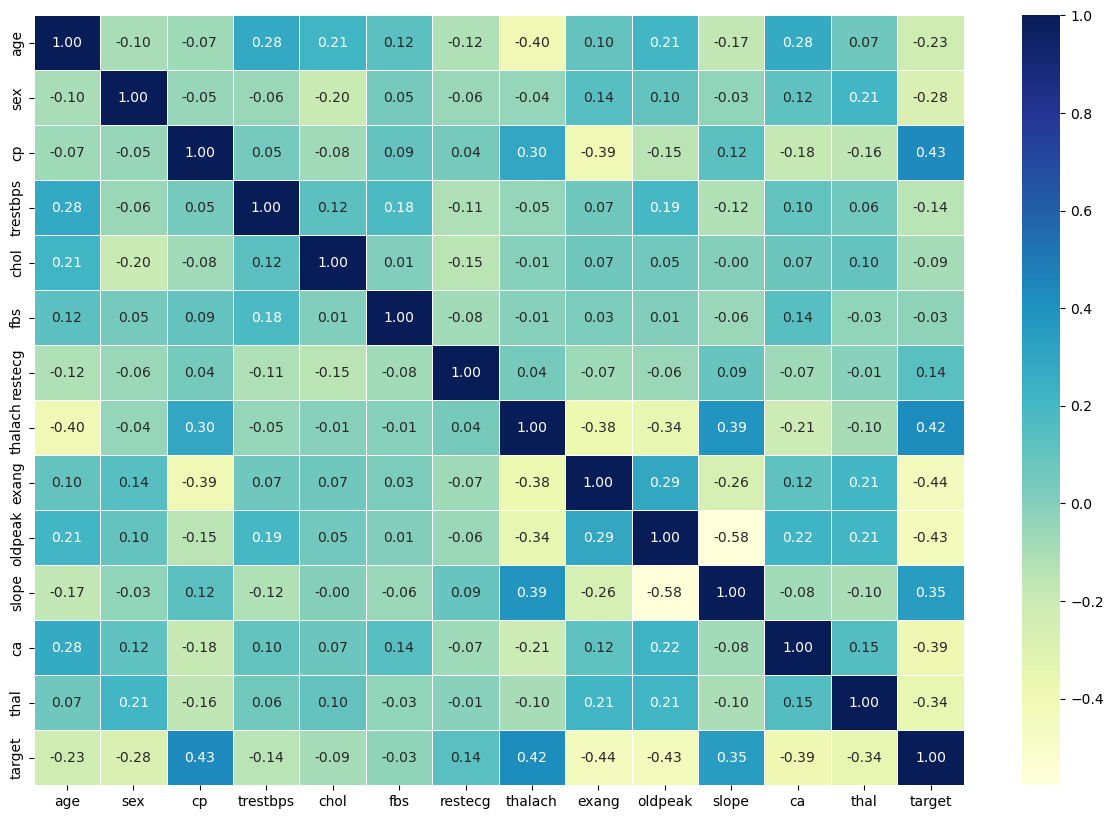

In [31]:
# Corelation matrix visualization 

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot=True, 
                 linewidths=0.5, 
                 fmt="0.2f", 
                 cmap="YlGnBu"); 

## 5. Modeling 

In [32]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [33]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [36]:
# Split the data into z & y 

x = df.drop("target", axis=1)
y = df["target"]

x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [37]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [38]:
# Spliting the data into training and test sets 

np.random.seed(42) # so that we could reproduce the result 

# Split into train & test sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [47]:
len(x_train), len(x_test)

(242, 61)

In [46]:
len(y_train), len(y_test)

(242, 61)

Now that we have prepared the data into train & test sets

We will now choose the machine learning models:
1. to train (find the patterns) on the training sets
2. to test (use the patterns) on the testing sets

We are going to try three different machine learning models:
```
1. Logistic Regression 
2. K-Nearest Neighbours Classifier 
3. Random Forest Classifier
```

In [48]:
# puttign models in a dictionary 

models = {
    "Logistic Regression": LogisticRegression(), 
    "KNN": KNeighborsClassifier(), 
    "Random Forest": RandomForestClassifier()
}

# create function to fit and score models 
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """"
    Fits and evaluates machine learning models 
    Models: a dict of different sckit-learn machine learning models 
    x_train: training data (no labels)
    x_test: testing data (no label)
    y_train: training labels 
    y_test: testing labels 
    """
    
    # set random seed (to reproduce results)
    np.random.seed(42)

    # make a dict to keep model scores 
    model_scores = {} 
    
    # loop thro models 
    for name, model in models.items():
        # fit model to data 
        model.fit(x_train, y_train)
        # evluate model and append its score to model_score 
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [54]:
# fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores = fit_and_score(models, x_train, x_test, y_train, y_test)
model_scores

/Users/saurabhranjan/Desktop/Codebase/ML-AI-Udemy/MilesP01/.P01.ENV/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Model Comparison 

<Axes: >

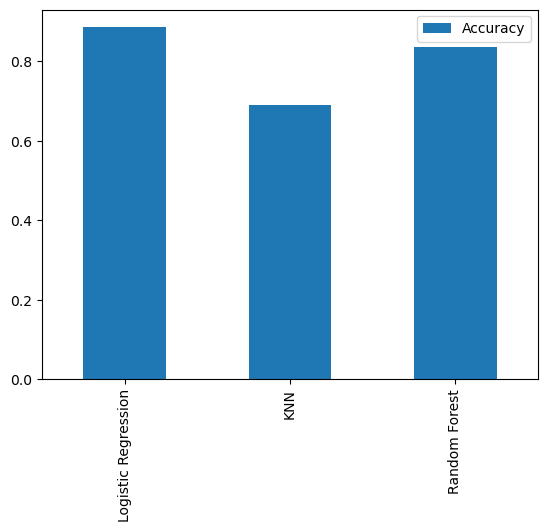

In [56]:
model_compare = pd.DataFrame(model_scores, index=["Accuracy"])
model_compare.T.plot.bar()

### Current Status 
Now we have got the baseline model but the accuracy is not what we expected.. since the first time predicitions are always not that great and we should not base our next steps on the baseline model. So now we will fine-tune the model to give us a minimum of `95% accuracy` for us to make use of it. 

** For this, we will do the following:
1. Hyperparameter tuning
2. Feature Importance
3. Confusion Matrix
4. Cross-validation
5. Precision
6. Recall
7. F1 Score
8. Classification Report
9. ROC Curve
10. Area under the curve (AUC)

## Hyperparameter tuning (manually -- by hand)

In [67]:
# Let's tune KNN 

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors 
neighbors = range(1,21)

# Setup KNN Instance 
knn = KNeighborsClassifier() 

# Loop thro different n_neighbors 
for i in neighbors:
    knn.set_params(n_neighbors=i)

    # fit the algorithm to improve the baseline score of KNN Model 
    knn.fit(x_train, y_train)

    # update trainign score list 
    train_scores.append(knn.score(x_train, y_train))

    # update test score list 
    test_scores.append(knn.score(x_test, y_test))
    

In [68]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [69]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN Score on test data: 75.41%


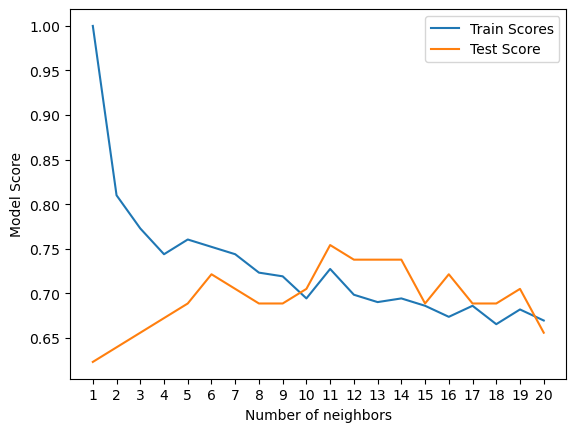

In [75]:
plt.plot(neighbors, train_scores, label="Train Scores")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1, 21, 1)) # adding custom range on x-axis
plt.xlabel("Number of neighbors")
plt.ylabel("Model Score")
plt.legend()


print(f"Maximum KNN Score on test data: {max(test_scores)*100:.2f}%")

## Hyperparameter tuning (using -- RandomizedSearchCV)

We are going to tune:

* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV!!

In [81]:
# Note; not all the parameters could be adjust for fine-tuning -- refer to the official documentations 

# Create hyperparameter grid for LogisticRegression; these are the parameters based on which we will be fine-tuning 
log_red_grid = {
    "C": np.logspace(-4, 4, 20), 
    "solver": ["liblinear"]
}

# Create hyperparameter grid for RandomForestClassifier 
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50), 
    "max_depth": [None, 3, 5, 10], 
    "min_samples_split": np.arange(2, 20, 2), 
    "min_samples_leaf": np.arange(1, 20, 2)
}

### So far -- using RandomizedSearchCV (CV; Cross Validation)
Above we have done the setup for the hyperparameters grid for each model. Now let's fine-tune them using RandomizedSearchCV. 

In [77]:
# Tune logistic regression 

np.random.seed(42) # make results repreoducable 

# Setup random hyperparameter search for LogisticRegression 
rs_log_reg = RandomizedSearchCV(LogisticRegression(), 
                               param_distributions=log_red_grid, 
                               cv=5,  # 5 sets of train & test data folds
                               n_iter=20, # no. of iterations
                               verbose=True)

# Fit hyperparameter search model for LogisticRegression 
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [83]:
# Checking the best parameter
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': np.float64(0.23357214690901212)}

In [84]:
# Evaluating the model on the test data 
rs_log_reg.score(x_test, y_test)

0.8852459016393442

In [82]:
# Random Forest Classifier: fine-tunig the random forest classifier now.. 

np.random.seed(42) # make result reproducable 

# Setup hyperparameter serach for RandomForestClassifier 
rs_rf = RandomizedSearchCV(RandomForestClassifier(), 
                          param_distributions=rf_grid, 
                          cv=5, 
                          n_iter=20, 
                          verbose=True)

# Fit hyperparameter search model for RandomForestClassifier 
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [85]:
# Checking for best parameter 
rs_rf.best_params_

{'n_estimators': np.int64(210),
 'min_samples_split': np.int64(4),
 'min_samples_leaf': np.int64(19),
 'max_depth': 3}

In [86]:
# Evaluating the model with the test data 
rs_rf.score(x_test, y_test)

0.8688524590163934

In [87]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCV

So far we have tried fine-tuning our models. From which, LogisticRegression models provides the best score. 

Using GridSearchCV -- we will try to fine-tune them further. 

In [89]:
# Different parameters for our LogisticRegression model 
log_reg_grid = {
    "C": np.logspace(-4, 4, 30),
    "solver": ["liblinear"]
}

# Setup grid hyperparameters search for LogisticRegression 
gs_log_reg = GridSearchCV(LogisticRegression(), 
                         param_grid=log_red_grid, 
                         cv=5,
                         verbose=True)
# Note; there's no n_iter in GridSearchCV -- because it tries all the combination available w/o having to specify the no. of iteration 

# Fit grid hyperparameter serach model 
gs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [90]:
# Checking the best hyperparameter 
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [91]:
# Evaluating the model with the test data 
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [92]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluating our tuned (trained) machine learning models (classifiers in specifics) beyond accuracy 

* ROC Curve and AUC Score 
* Confusion Matrix 
* Classification Report 
* Precision 
* Recall 
* F1-Score 

... would be great if cross-validation was used wherever possible. 

To make comparison and evaluate our trained models, first we need to make predictions. 

In [93]:
# Make predictions with the tuned models 

y_preds = gs_log_reg.predict(x_test)

In [94]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [96]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

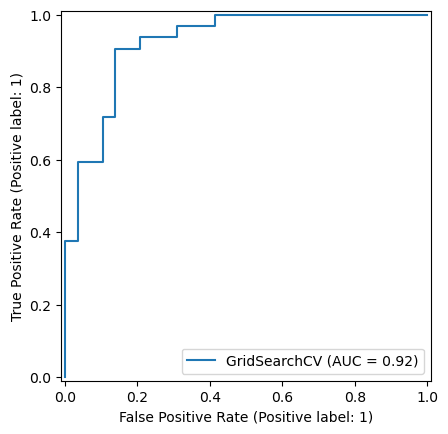

In [101]:
# ROC Curve: is a way of comparing, how our models are performing. By comparing the `True` positive rate by `False` positive rate 

# Note: since all the imports are done in the begining so no need to import anyting, jumping straight to plotting 

# Plot ROC Curve & calculate AUC Matrix 
# plot_roc_curve(gs_log_reg, x_test, y_test) # func is depricated in the newer version 

RocCurveDisplay.from_estimator(estimator=gs_log_reg, 
                              X=x_test, 
                              y=y_test);

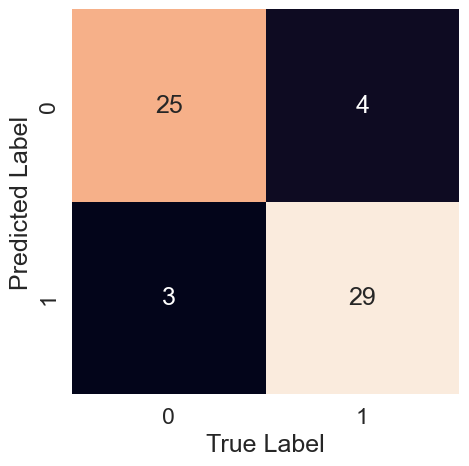

In [106]:
# Confusion Matrix; using sns lib and custom function for calculating Confusion Matrix 

sns.set(font_scale=1.5)

# custom function 
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """

    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds), 
                    annot=True, 
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")

plot_conf_mat(y_test, y_preds)

### So far, in Evaluation: 
we have covered the ROC curve, AUC metrix, and confusion metrix. Now let's get a classification report, cross-validated precision, recall, and F1-score.

In [107]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrix using cross-validation 

We are going to calculate precision, accuracy, recall, and f1 score of our mdoel using cross-validation and to do so we're going to use `cross_val_score()`

In [108]:
# check best hyperparameters 
gs_log_reg.best_params_

{'C': np.float64(0.23357214690901212), 'solver': 'liblinear'}

In [116]:
# Create a new classifier with the best parameters 
clf = LogisticRegression(C=0.23357214690901212,
                        solver="liblinear")

In [117]:
# Cross-validated accuray 
cv_acc = cross_val_score(clf, x, y, cv=5, scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [118]:
cv_acc = np.mean(cv_acc)
cv_acc

np.float64(0.8479781420765027)

In [122]:
# Cross-validated precision 
cv_precision = cross_val_score(clf, x, y, cv=5, scoring="precision")
# cv_precision
cv_precision = np.mean(cv_precision)
cv_precision

np.float64(0.8215873015873015)

In [123]:
# Cross-validated recall 
cv_recall = cross_val_score(clf, x, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

np.float64(0.9272727272727274)

In [124]:
# Cross-validated f1-score 
cv_f1 = cross_val_score(clf, x, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

np.float64(0.8705403543192143)

<Axes: title={'center': 'Cross-validated classification metrics'}>

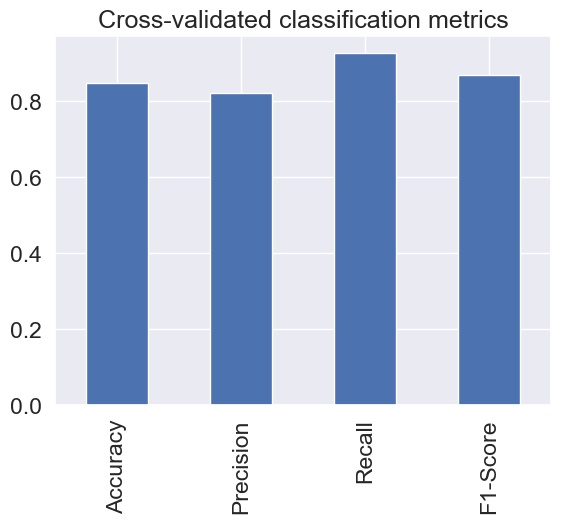

In [128]:
# Visual representation of the metrixes 
cv_metrics = pd.DataFrame({
    "Accuracy": cv_acc, 
    "Precision": cv_precision, 
    "Recall": cv_recall, 
    "F1-Score": cv_f1, 
}, index=[0])

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False)

## Feature Importance:

It gives us, which features contributed most to the outcome of the model. It can also give info onm how did they contribute?

Finding `Feature Importance` is different for each machine learning models. 

Here, finding the feature importance for the `LogisticRegression model`. 

In [134]:
# Fit an instance of the LogisticRegression 
gs_log_reg.best_params_

clf = LogisticRegression(C=0.23357214690901212, solver="liblinear")
clf.fit(x_train, y_train); 

In [135]:
# Checking the co-eficient; coef_
clf.coef_

array([[ 0.00369922, -0.90424085,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490184,  0.02472939, -0.63120401, -0.57590907,
         0.47095114, -0.65165351, -0.699842  ]])

In [136]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': np.float64(0.0036992183888253745),
 'sex': np.float64(-0.9042408501085847),
 'cp': np.float64(0.6747282821086095),
 'trestbps': np.float64(-0.011613404102959121),
 'chol': np.float64(-0.0017036448681656052),
 'fbs': np.float64(0.047876890207064565),
 'restecg': np.float64(0.3349018404728445),
 'thalach': np.float64(0.024729385235129804),
 'exang': np.float64(-0.6312040075913284),
 'oldpeak': np.float64(-0.5759090719483074),
 'slope': np.float64(0.4709511374925031),
 'ca': np.float64(-0.6516535114765922),
 'thal': np.float64(-0.6998419993348973)}

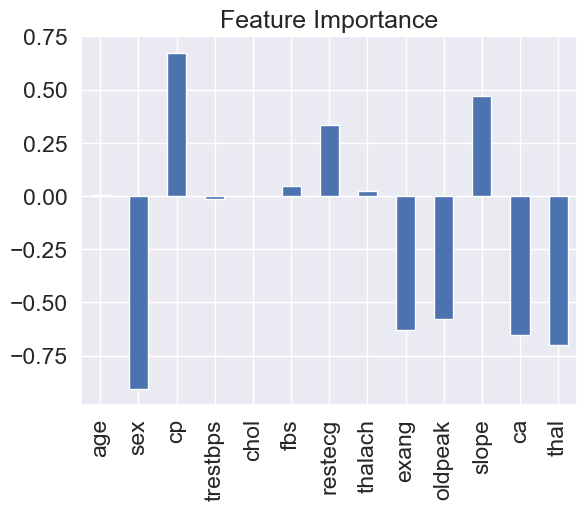

In [138]:
# Visualizing the feature importance 
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);